https://www.kaggle.com/code/shriharijhawar13/cnn-model-for-sign-language-mnist-dataset#CNN-Model-creation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [2]:
def ajout_image_x(liste=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_Biwi/images-ind_alphabet/{i}_{place}.png')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(place, 24.),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1
def ajout_image_y(liste=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_Biwi/images-ind_alphabet/{i}_{place}.png')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(-1,place),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1

In [3]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [4]:
X_train = training_data.drop(labels = ["label"],axis = 1) 
Y_train = training_data["label"]

In [5]:
X_test = test_data.drop(labels = ["label"],axis = 1)
Y_test = test_data["label"]

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(27455, 784)

(7172, 784)

(27455,)

(7172,)

<AxesSubplot:xlabel='label', ylabel='Count'>

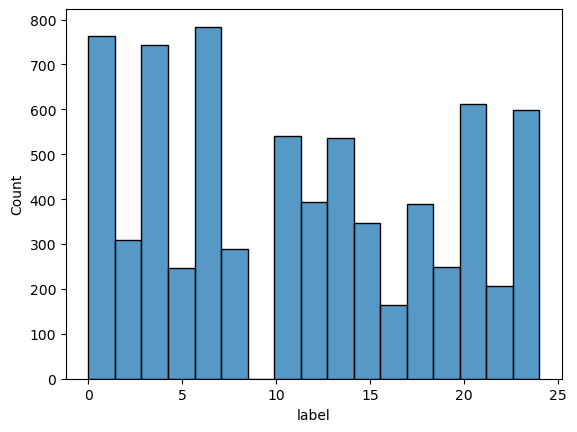

In [8]:
sns.histplot(x=Y_test, data = Y_test)

<AxesSubplot:xlabel='label', ylabel='Count'>

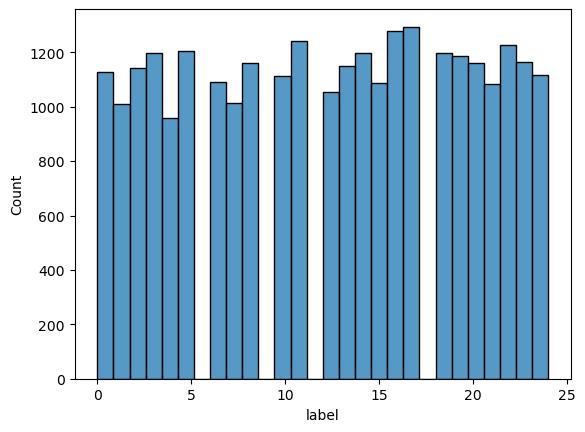

In [9]:
sns.histplot(x=Y_train, data = Y_train)

In [10]:
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()

apprentissage_LR = round(stop1-start,3)
prediction_LR = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_LR} s")
print(f"Temps d'apprentissage+prediction : {prediction_LR} s")

Temps d'apprentissage : 91.504 s
Temps d'apprentissage+prediction : 91.532 s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


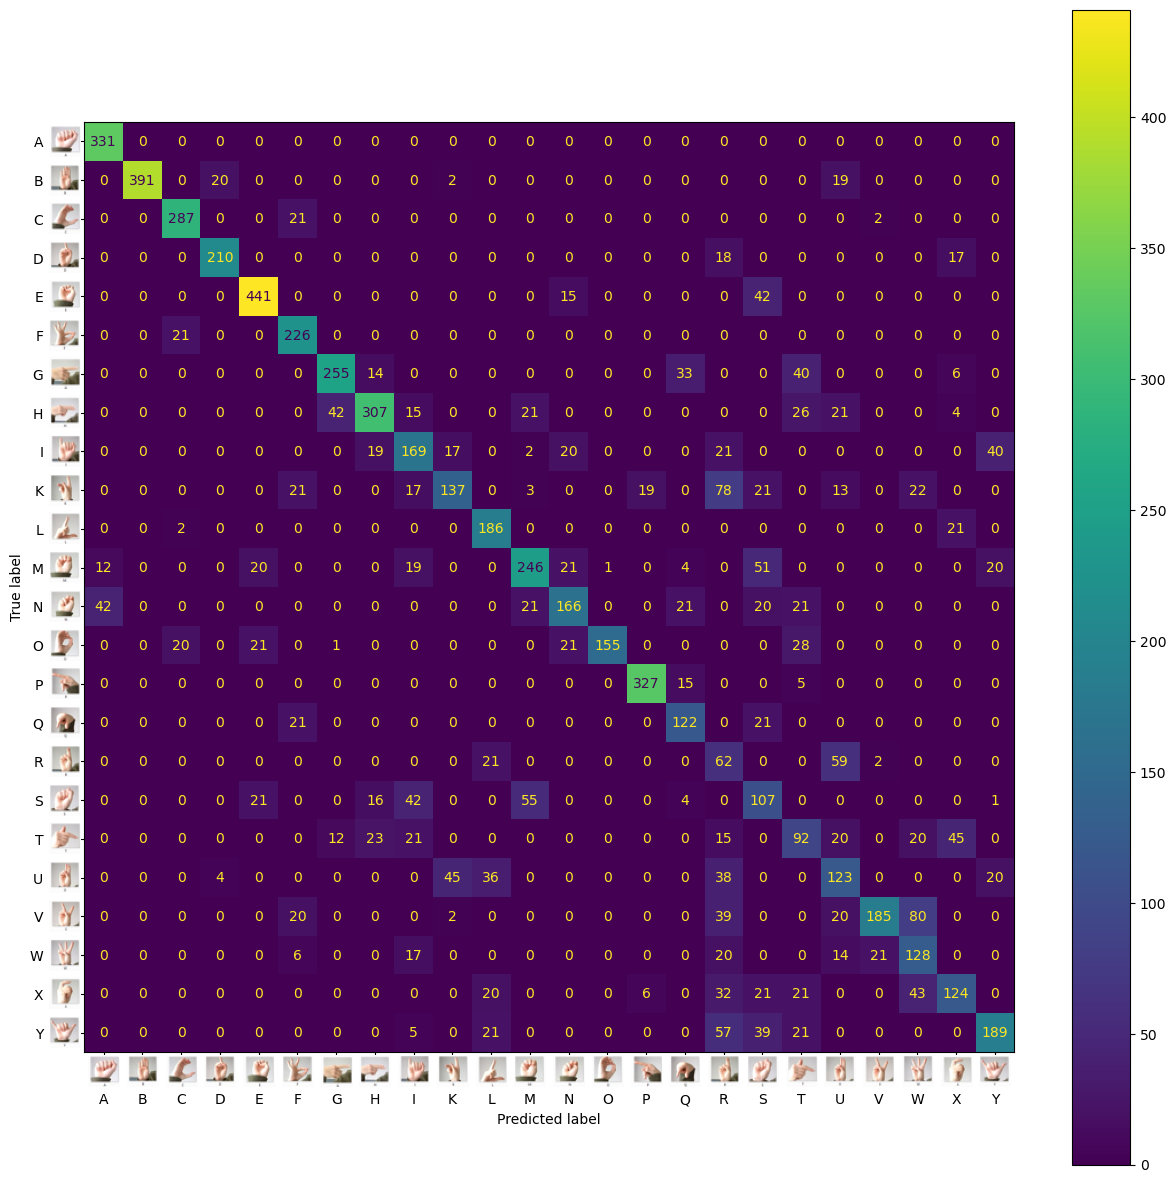

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax)


ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()

fig.set_size_inches(15, 15)

In [12]:
# from sklearn.metrics import precision_score,f1_score

# precision = precision_score(Y_test,Y_pred)
# f1_score = f1_score(Y_test,Y_pred)
# tp,fp,fn,tn=cm.ravel()
# sensibilite = tp/(tp+fn)
# specificite = tn/(tn+fp)

In [13]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_raw_LR = pd.DataFrame.from_dict(report)
score_classification_report_raw_LR=classification_report_raw_LR['macro avg']

In [14]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
start = time.time()

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)
stop1 = time.time()


Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_LR_normalize = round(stop1-start,3)
prediction_LR_normalize = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_LR_normalize} s")
print(f"Temps d'apprentissage+prediction : {prediction_LR_normalize} s")

Temps d'apprentissage : 64.649 s
Temps d'apprentissage+prediction : 64.667 s


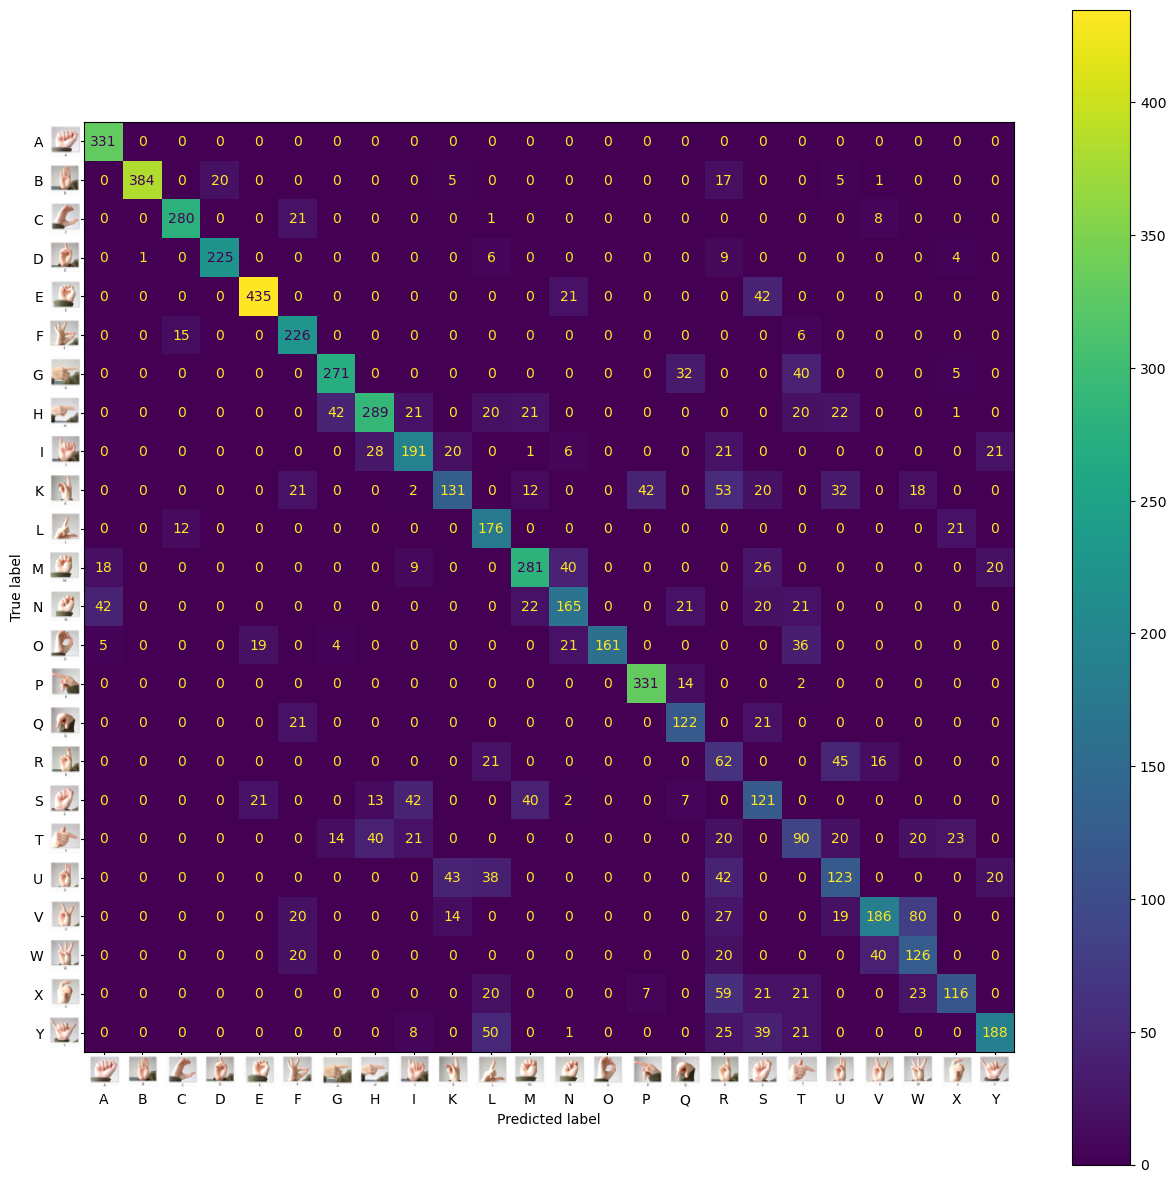

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax)


ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()

fig.set_size_inches(15, 15)

In [17]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_normalize_LR = pd.DataFrame.from_dict(report)
score_classification_report_normalize_LR=classification_report_normalize_LR['macro avg']

**Normaliser permet d'avoir de meilleurs scores et de converger**

**Utiliser Gaussian NB**

In [18]:
from sklearn.naive_bayes import GaussianNB
start = time.time()

model = GaussianNB()

reg = model.fit(X_train,Y_train)
stop1 = time.time()


Y_pred = model.predict(X_test)

stop2 = time.time()
apprentissage_NB = round(stop1-start,3)
prediction_NB = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_NB} s")
print(f"Temps d'apprentissage+prediction : {prediction_NB} s")

Temps d'apprentissage : 0.601 s
Temps d'apprentissage+prediction : 1.838 s


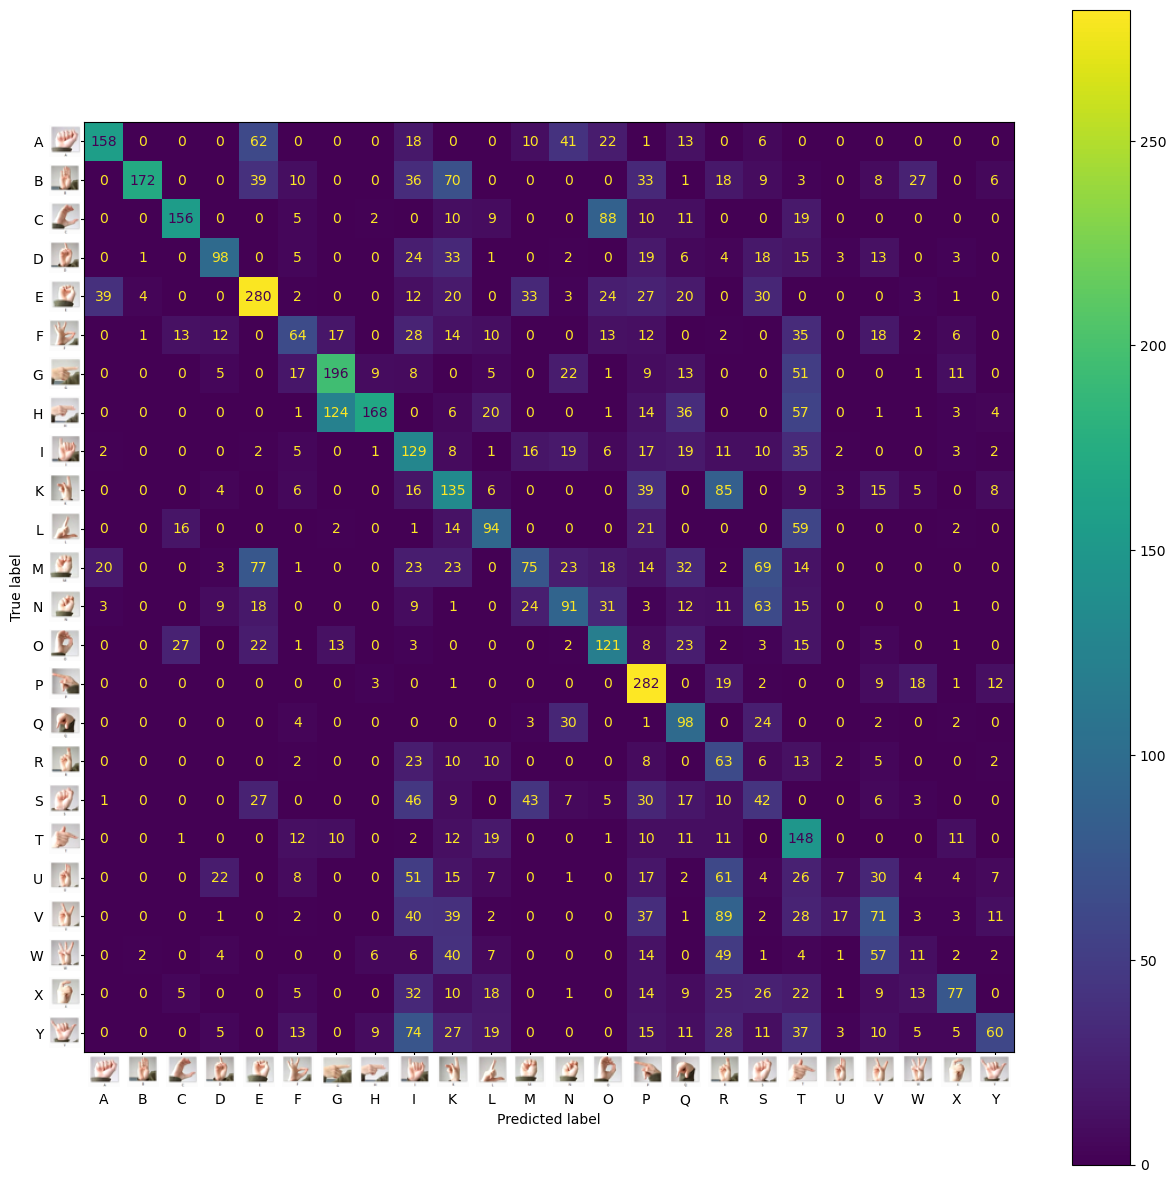

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(ax=ax)


ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()





# changer la taille de la figure en utilisant la méthode set_size_inches
fig.set_size_inches(15, 15)

In [20]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_NB = pd.DataFrame.from_dict(report)
score_classification_report_NB=classification_report_NB['macro avg']

**Utiliser le decision tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

# créer un modèle d'arbres de décision
model = DecisionTreeClassifier()

# entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, Y_train)
stop1 = time.time()

# prédire des labels pour les données de test
Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_DTC = round(stop1-start,3)
prediction_DTC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_DTC} s")
print(f"Temps d'apprentissage+prediction : {prediction_DTC} s")

Temps d'apprentissage : 18.031 s
Temps d'apprentissage+prediction : 18.05 s


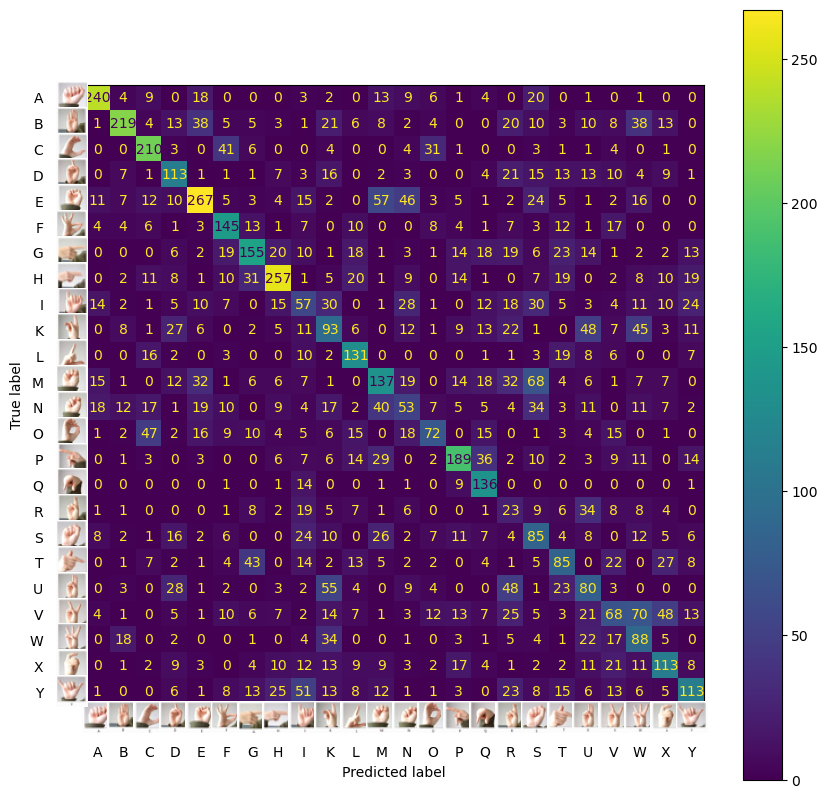

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(ax=ax)

ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()






In [23]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_DTC = pd.DataFrame.from_dict(report)
score_classification_report_DTC=classification_report_DTC['macro avg']

**Random Forrest Classfiier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,Y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Temps d'apprentissage : 48.339 s
Temps d'apprentissage+prediction : 48.73 s


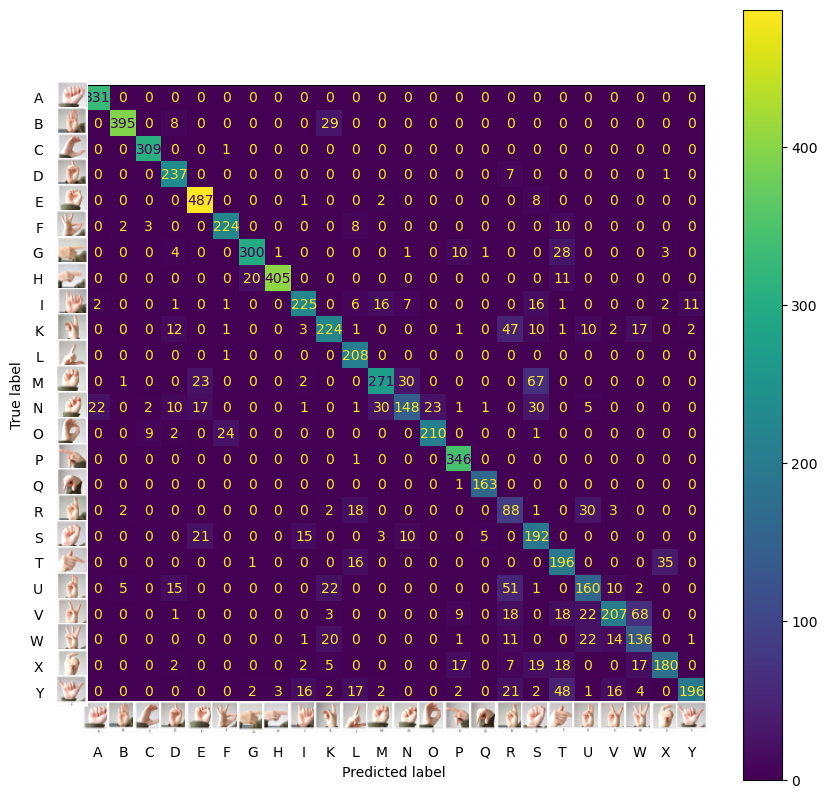

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(ax=ax)


ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()








In [26]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_RFC = pd.DataFrame.from_dict(report)
classification_report_RFC
score_classification_report_RFC=classification_report_RFC['macro avg']

In [27]:
from sklearn.neural_network import MLPClassifier
start=time.time()
model = MLPClassifier()

reg = model.fit(X_train,Y_train)
stop1=time.time()
Y_pred = model.predict(X_test)
stop2=time.time()
apprentissage_MLPC = round(stop1-start,3)
prediction_MLPC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_MLPC} s")
print(f"Temps d'apprentissage+prediction : {prediction_MLPC} s")

Temps d'apprentissage : 32.027 s
Temps d'apprentissage+prediction : 32.07 s


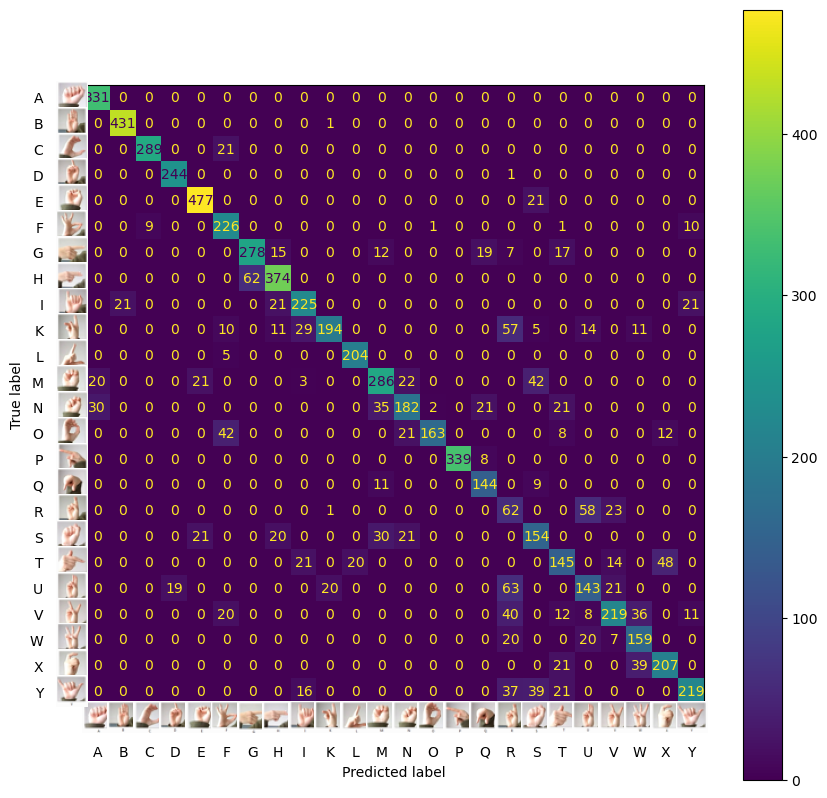

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax)

ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()





In [29]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_MLPC = pd.DataFrame.from_dict(report)
classification_report_MLPC
score_classification_report_MLPC=classification_report_MLPC['macro avg']

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
start=time.time()
# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu')

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)
stop1=time.time()

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)

# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)
stop2=time.time()

apprentissage_BMLPC = round(stop1-start,3)
prediction_BMLPC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_BMLPC} s")
print(f"Temps d'apprentissage+prediction : {prediction_BMLPC} s")

Temps d'apprentissage : 28.22 s
Temps d'apprentissage+prediction : 317.394 s


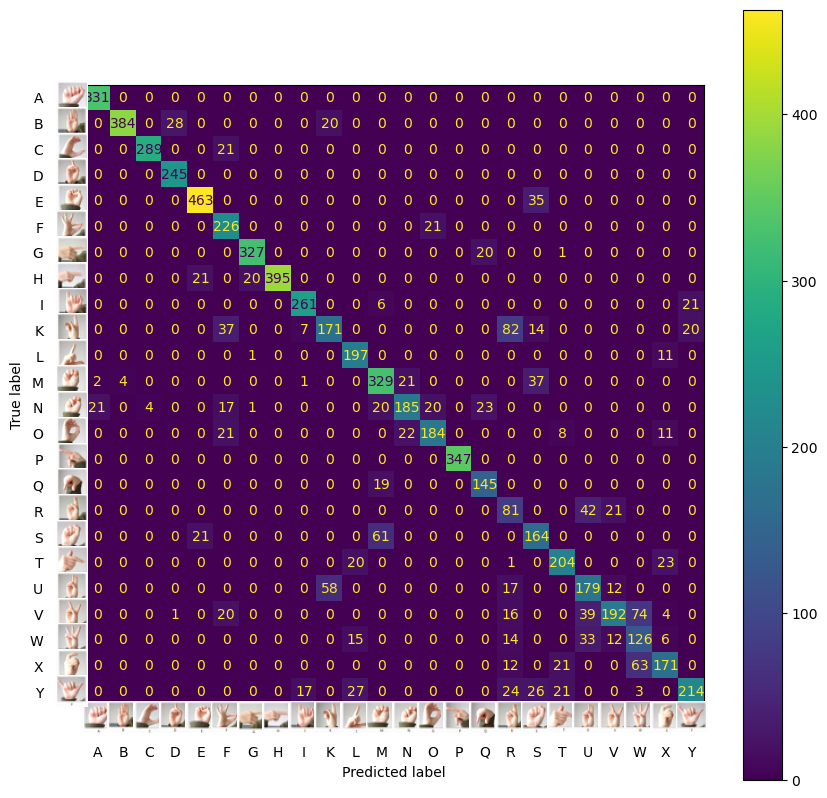

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax)

ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()





In [32]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC = pd.DataFrame.from_dict(report)
classification_report_BMLPC
score_classification_report_BMLPC=classification_report_BMLPC['macro avg']

**On cherche de meilleurs paramètres**

In [33]:
#Ne fonctionne pas à l'ICAM
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Normaliser les données d'entrée
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Définir les hyperparamètres à tester
# parameters = {'hidden_layer_sizes': [(100, 100), (200, 200)],
#               'activation': ['relu', 'tanh'],
#               'alpha': [0.0001, 0.001]}

# # Utiliser la recherche en grille pour sélectionner les meilleurs hyperparamètres
# clf = GridSearchCV(MLPClassifier(), parameters, cv=5)
# clf.fit(X_train_scaled, Y_train)

# # Imprimer les meilleurs hyperparamètres trouvés
# print(clf.best_params_)

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
start=time.time()
# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',alpha=0.0001)

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)
stop1=time.time()

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)
# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)

stop2=time.time()
apprentissage_BMLPC2 = round(stop1-start,3)
prediction_BMLPC2 = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_BMLPC2} s")
print(f"Temps d'apprentissage+prediction : {prediction_BMLPC2} s")

Temps d'apprentissage : 27.846 s
Temps d'apprentissage+prediction : 319.449 s


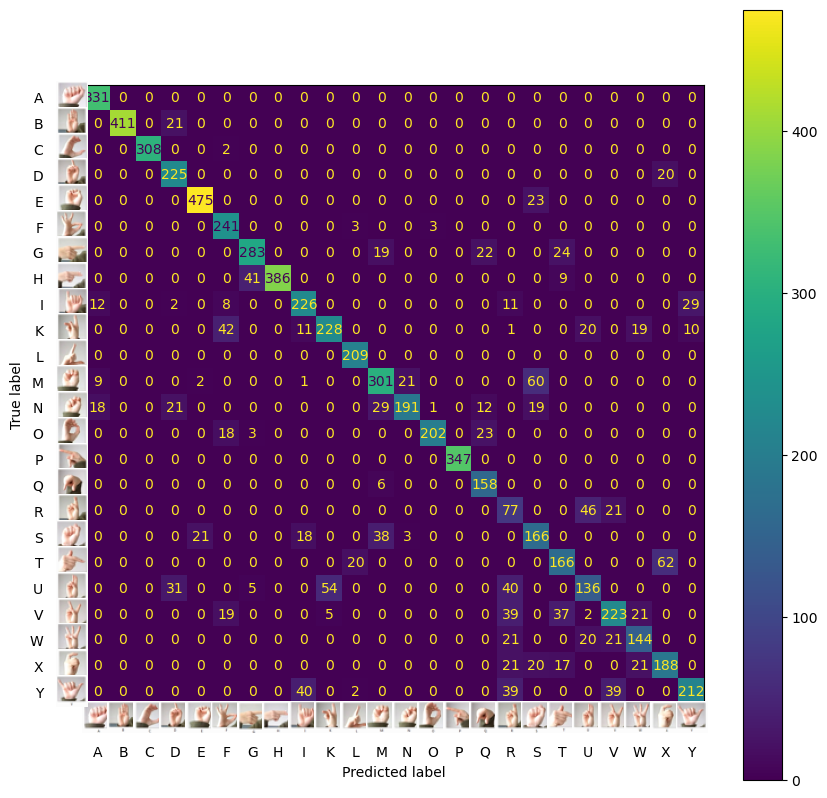

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot(ax=ax)



ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()








In [36]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC2 = pd.DataFrame.from_dict(report)
classification_report_BMLPC2
score_classification_report_BMLPC2=classification_report_BMLPC2['macro avg']

**Pas vraiment de meilleurs résultats**

In [37]:
# In this step we are dividing the dataset in to X and Y training values
# X contains information about the images 
# Y contains the correspondind label of that image
# These two values will be used to train the model
#creating our X for the training data
x_train = training_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_train = training_data["label"]

# In this step we are dividing the dataset in to X and Y test values
# X contains information about the images
# Y contains the correspondind label of that image
# These two values will be used to test the model
#creating our X for the training data
x_test = test_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_test = test_data["label"]

In [38]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [39]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [41]:
start=time.time()

model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
liste=[1831,128,12]
liste_history=[]
for k in liste:
    epochs = 10
    batch_size = k
    history = model.fit(x = x_train, y = y_train, epochs = epochs, batch_size = batch_size,validation_split=0.2,verbose=1)
    stop1=time.time()
    pred = model.predict(x_test)
    stop2=time.time()
    apprentissage_CNN = round(stop1-start,3)
    prediction_CNN = round(stop2-start,3)
    print(f"Temps d'apprentissage : {apprentissage_CNN} s")
    print(f"Temps d'apprentissage+prediction : {prediction_CNN} s")
    liste_history.append(history.history)

Epoch 1/10
12/12 [==============================] - 15s 1s/step - loss: 3.2449 - accuracy: 0.0760 - val_loss: 3.2491 - val_accuracy: 0.0419
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 2.8032 - accuracy: 0.1611 - val_loss: 3.2560 - val_accuracy: 0.0419
Epoch 3/10
12/12 [==============================] - 17s 1s/step - loss: 2.3653 - accuracy: 0.2564 - val_loss: 3.2844 - val_accuracy: 0.0382
Epoch 4/10
12/12 [==============================] - 17s 1s/step - loss: 1.8821 - accuracy: 0.3757 - val_loss: 3.3123 - val_accuracy: 0.0619
Epoch 5/10
12/12 [==============================] - 17s 1s/step - loss: 1.4460 - accuracy: 0.5031 - val_loss: 3.3815 - val_accuracy: 0.0439
Epoch 6/10
12/12 [==============================] - 17s 1s/step - loss: 1.1075 - accuracy: 0.6091 - val_loss: 3.4716 - val_accuracy: 0.0412
Epoch 7/10
12/12 [==============================] - 17s 1s/step - loss: 0.8954 - accuracy: 0.6765 - val_loss: 3.6400 - val_accuracy: 0.0397
Epoch 8/10
12/12 [==

In [46]:
liste_history

[{'loss': [3.2448673248291016,
   2.803173065185547,
   2.3653066158294678,
   1.882100224494934,
   1.4460391998291016,
   1.1074891090393066,
   0.89537513256073,
   0.7156274914741516,
   0.5927790999412537,
   0.5071852207183838],
  'accuracy': [0.07598797976970673,
   0.16112729907035828,
   0.2563740611076355,
   0.3756601810455322,
   0.5031415224075317,
   0.6091331243515015,
   0.6765161156654358,
   0.7428519129753113,
   0.7873338460922241,
   0.8224822282791138],
  'val_loss': [3.249098300933838,
   3.2559561729431152,
   3.2844278812408447,
   3.312277317047119,
   3.3815360069274902,
   3.4715614318847656,
   3.639967203140259,
   3.76698899269104,
   4.005162715911865,
   4.171857833862305],
  'val_accuracy': [0.04188672453165054,
   0.04188672453165054,
   0.038244400173425674,
   0.061919502913951874,
   0.043890003114938736,
   0.04115825891494751,
   0.03970132768154144,
   0.03970132768154144,
   0.03988344594836235,
   0.04134037345647812]},
 {'loss': [0.3699129223

In [44]:
def plot_CNN_results(history):
    # Extract the training accuracy and loss
    acc = history.history['accuracy']
    loss = history.history['loss']

    # Extract the validation accuracy and loss
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    plt.figure()

    # Plot the training accuracy
    plt.plot(acc, label='Training Accuracy')

    # Plot the validation accuracy
    plt.plot(val_acc, label='Validation Accuracy')

    # Set the x-axis range
    plt.title("Evolution du score precision en fonction des epochs")
    plt.xlim(0, epochs)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.figure()

    # Plot the training loss
    plt.plot(loss, label='Training Loss')

    # Plot the validation loss
    plt.plot(val_loss, label='Validation Loss')

    # Set the x-axis range
    plt.title("Evolution du score training loss en fonction des epochs")

    plt.xlim(0, epochs)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

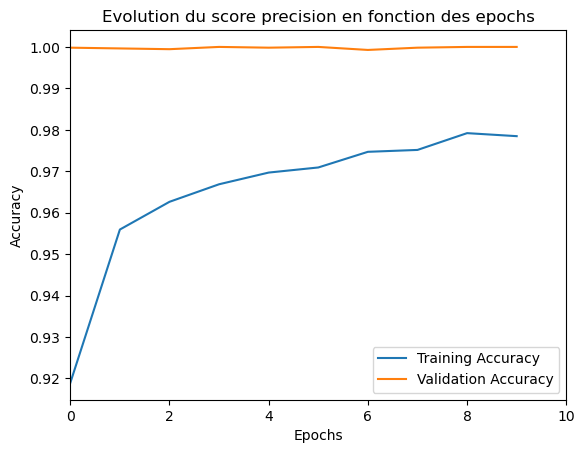

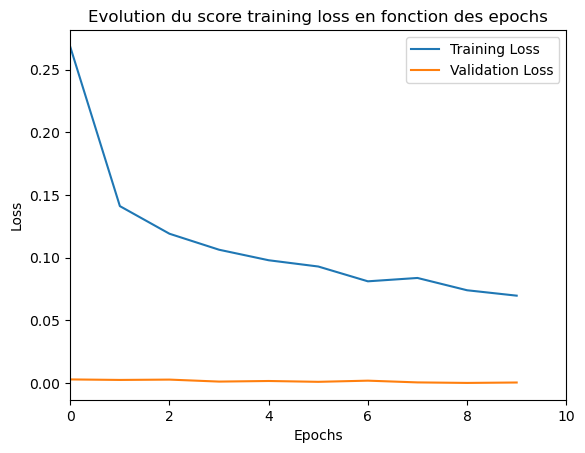

In [45]:
plot_CNN_results(history)

In [ ]:
display(y_train.shape)
display(y_test.shape)
display(pred.shape)

In [47]:
# Convertir les probabilités de classe en prédictions de classe
y_pred = np.argmax(pred, axis=1)

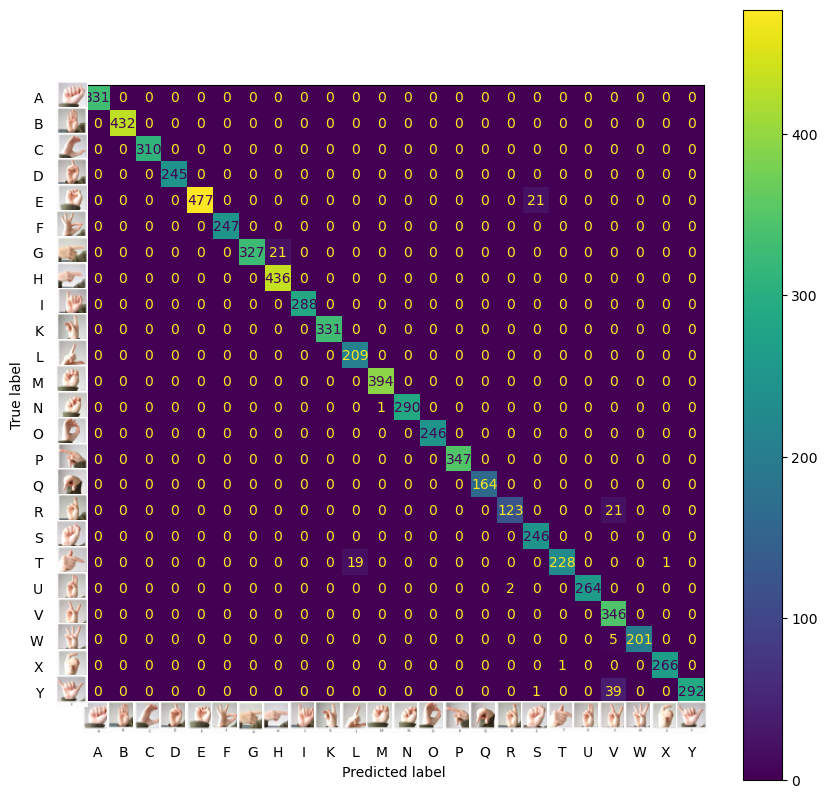

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax)

ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
# Set the x-tick labels

xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x(ASL_ticks)
ajout_image_y(ASL_ticks)





In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred,output_dict=True)

classification_report_CNN = pd.DataFrame.from_dict(report)
classification_report_CNN
score_classification_report_CNN=classification_report_CNN['macro avg']

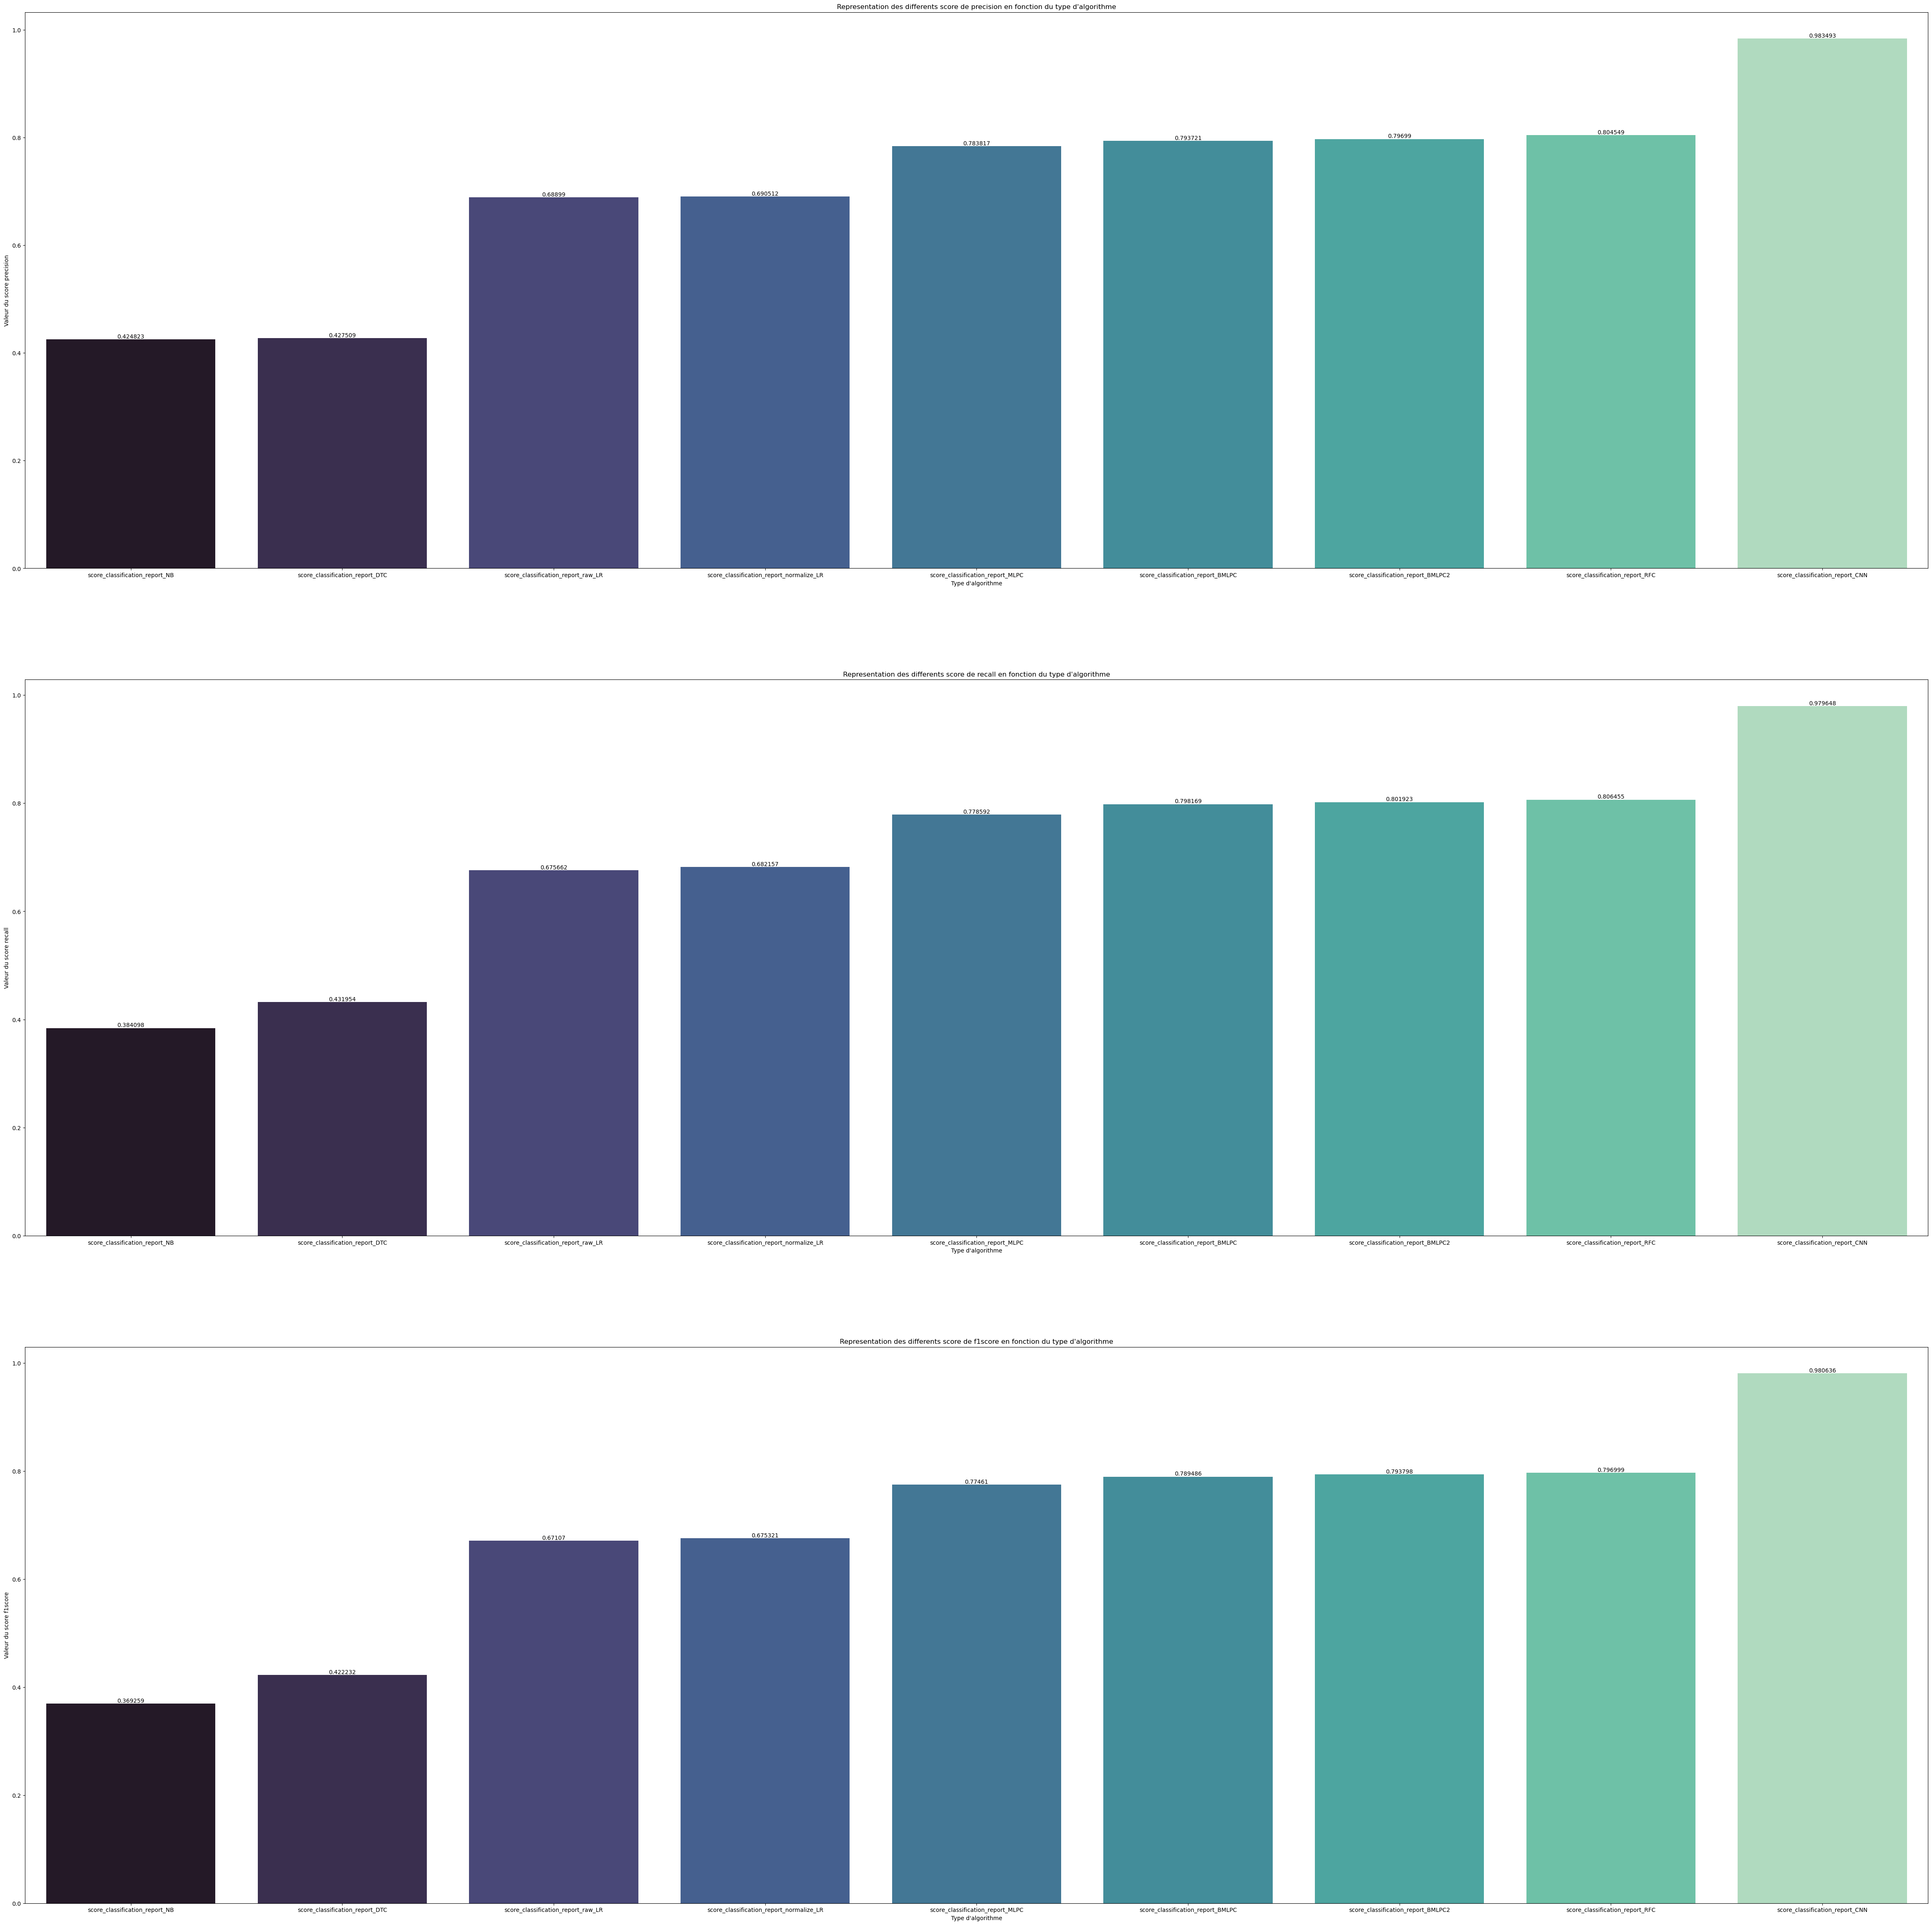

In [51]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('score_classification'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

# data

df_score = pd.DataFrame(data)

s=df_score.iloc[0,:]
df_score_precision=s.to_frame()
df_score_precision=df_score_precision.T

v=df_score.iloc[1,:]
df_score_recall=v.to_frame()
df_score_recall=df_score_recall.T

w=df_score.iloc[2,:]
df_score_f1score=w.to_frame()
df_score_f1score=df_score_f1score.T

j=df_score.iloc[3,:]
df_score_support=j.to_frame()
df_score_support=df_score_support.T

df_score_precision.sort_values(by=['precision'],axis=1,inplace=True)
df_score_recall.sort_values(by=['recall'],axis=1,inplace=True)
df_score_f1score.sort_values(by=['f1-score'],axis=1,inplace=True)

# figure, ax = plt.subplots(figsize=(30, 30))
# fig = sns.barplot(data = df_score_precision)
# fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de precision en fonction du type d'algorithme")
# fig.bar_label(ax.containers[0])
# fig2=sns.barplot(data = df_score_recall)
# fig2.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de recall en fonction du type d'algorithme")
# fig2.bar_label(ax.containers[0])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(60,60))
# plot the first data frame
# df1.plot(ax=ax1)
fig = sns.barplot(data = df_score_precision,ax=ax1,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de precision en fonction du type d'algorithme")
fig.bar_label(ax1.containers[0])
# plot the second data frame
fig = sns.barplot(data = df_score_recall,ax=ax2,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score recall",title = "Representation des differents score de recall en fonction du type d'algorithme")
fig.bar_label(ax2.containers[0])
# plot the third data frame
fig = sns.barplot(data = df_score_f1score,ax=ax3,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score f1score",title = "Representation des differents score de f1score en fonction du type d'algorithme")
fig.bar_label(ax3.containers[0])
# show the figure
plt.show()

[Text(0, 0, '0.601'),
 Text(0, 0, '18.031'),
 Text(0, 0, '27.846'),
 Text(0, 0, '28.22'),
 Text(0, 0, '32.027'),
 Text(0, 0, '48.339'),
 Text(0, 0, '64.649'),
 Text(0, 0, '91.504'),
 Text(0, 0, '671.93')]

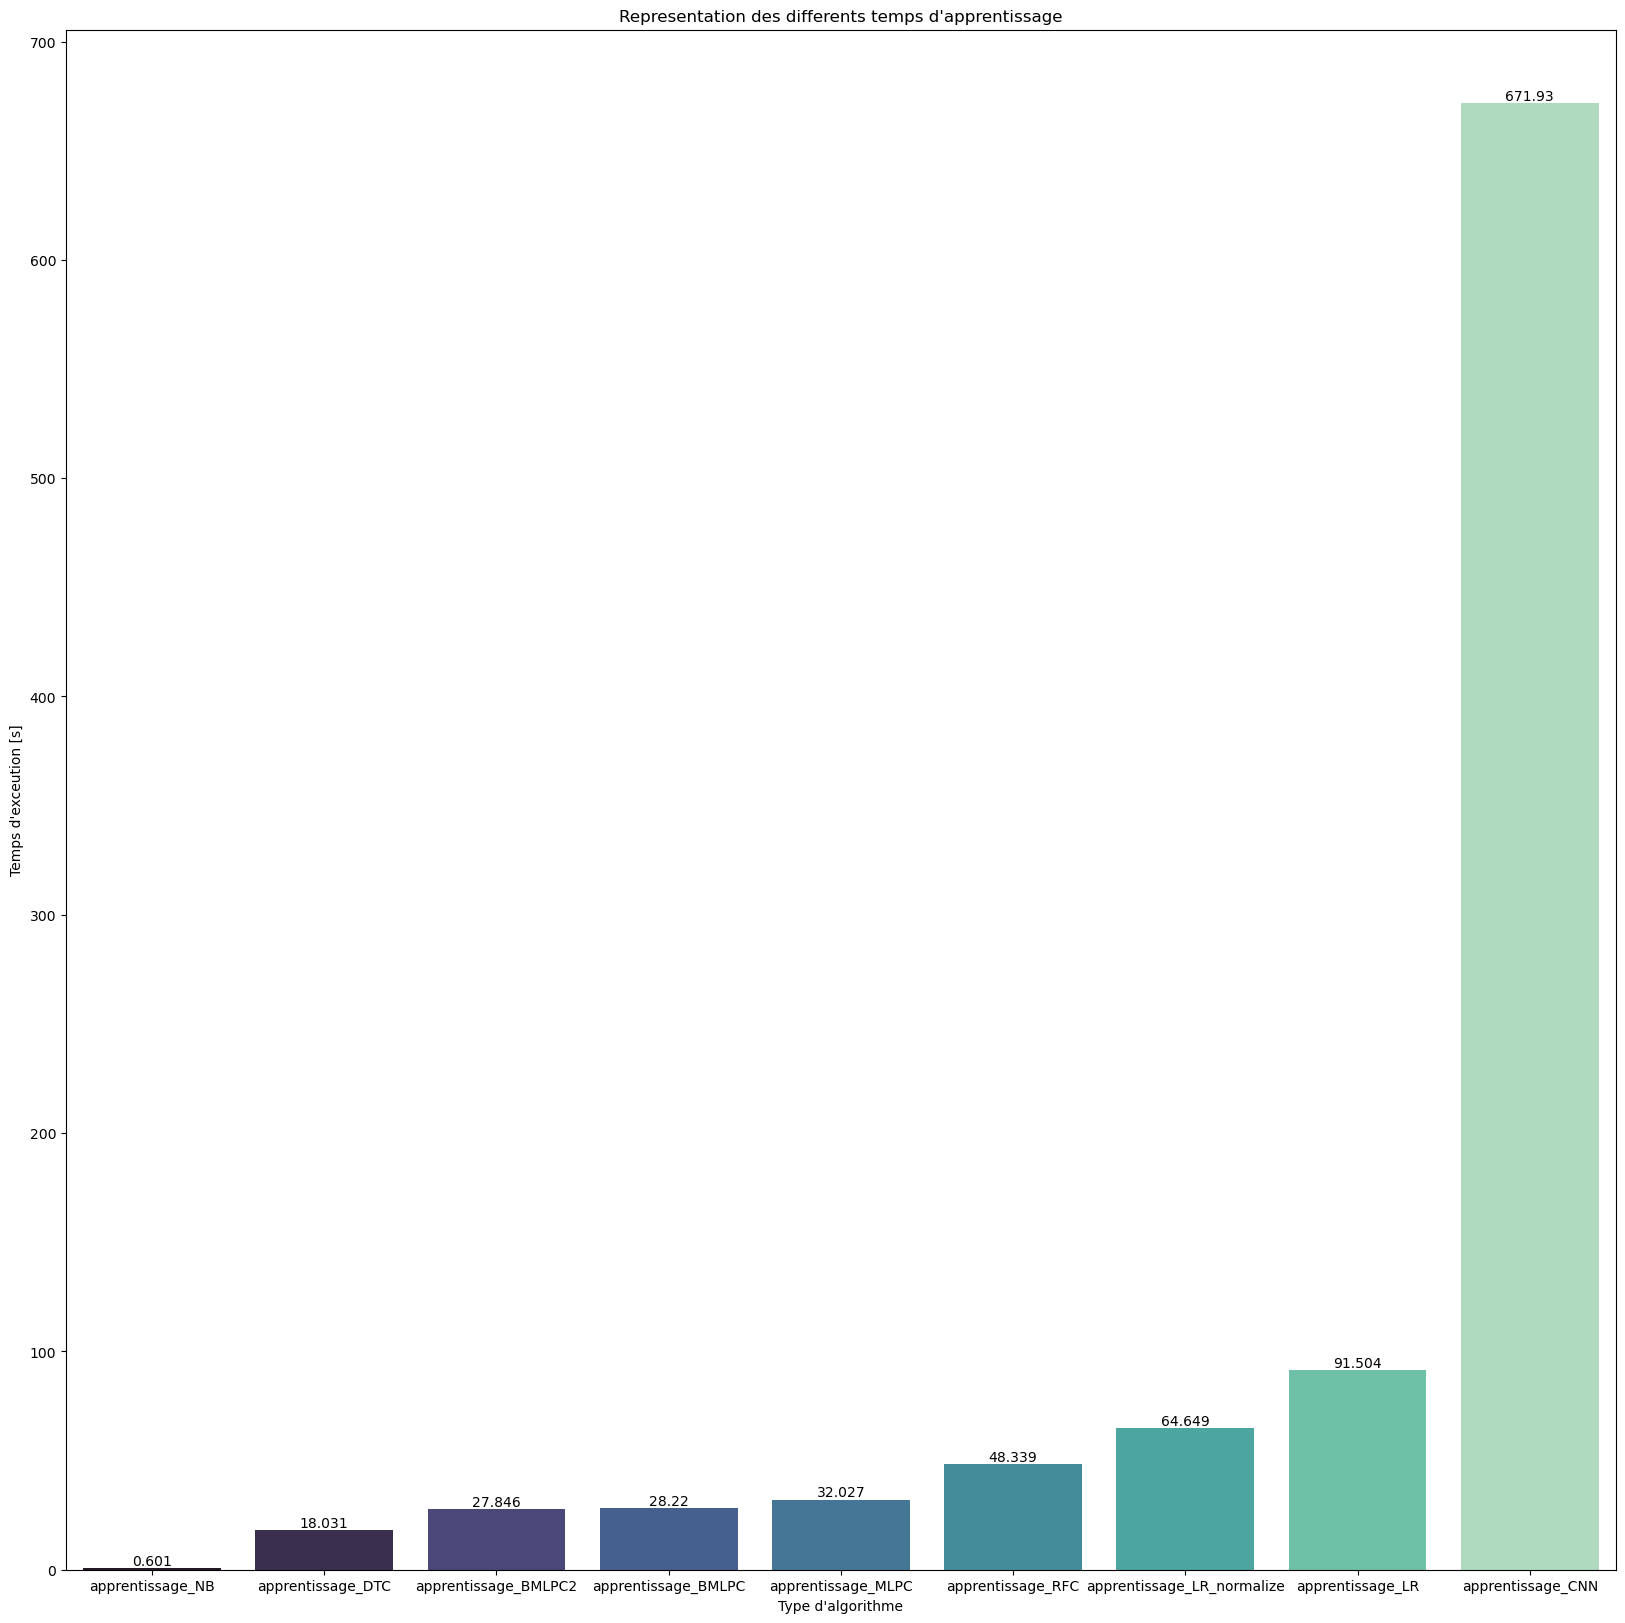

In [52]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('apprentissage_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

figure,ax = plt.subplots(figsize=(20, 20))
df_apprentissage = pd.DataFrame(data, index=['Temps_execution_s'])
df_apprentissage.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_apprentissage,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage")
fig.bar_label(ax.containers[0])

[Text(0, 0, '1.838'),
 Text(0, 0, '18.05'),
 Text(0, 0, '32.07'),
 Text(0, 0, '48.73'),
 Text(0, 0, '64.667'),
 Text(0, 0, '91.532'),
 Text(0, 0, '317.394'),
 Text(0, 0, '319.449'),
 Text(0, 0, '673.78')]

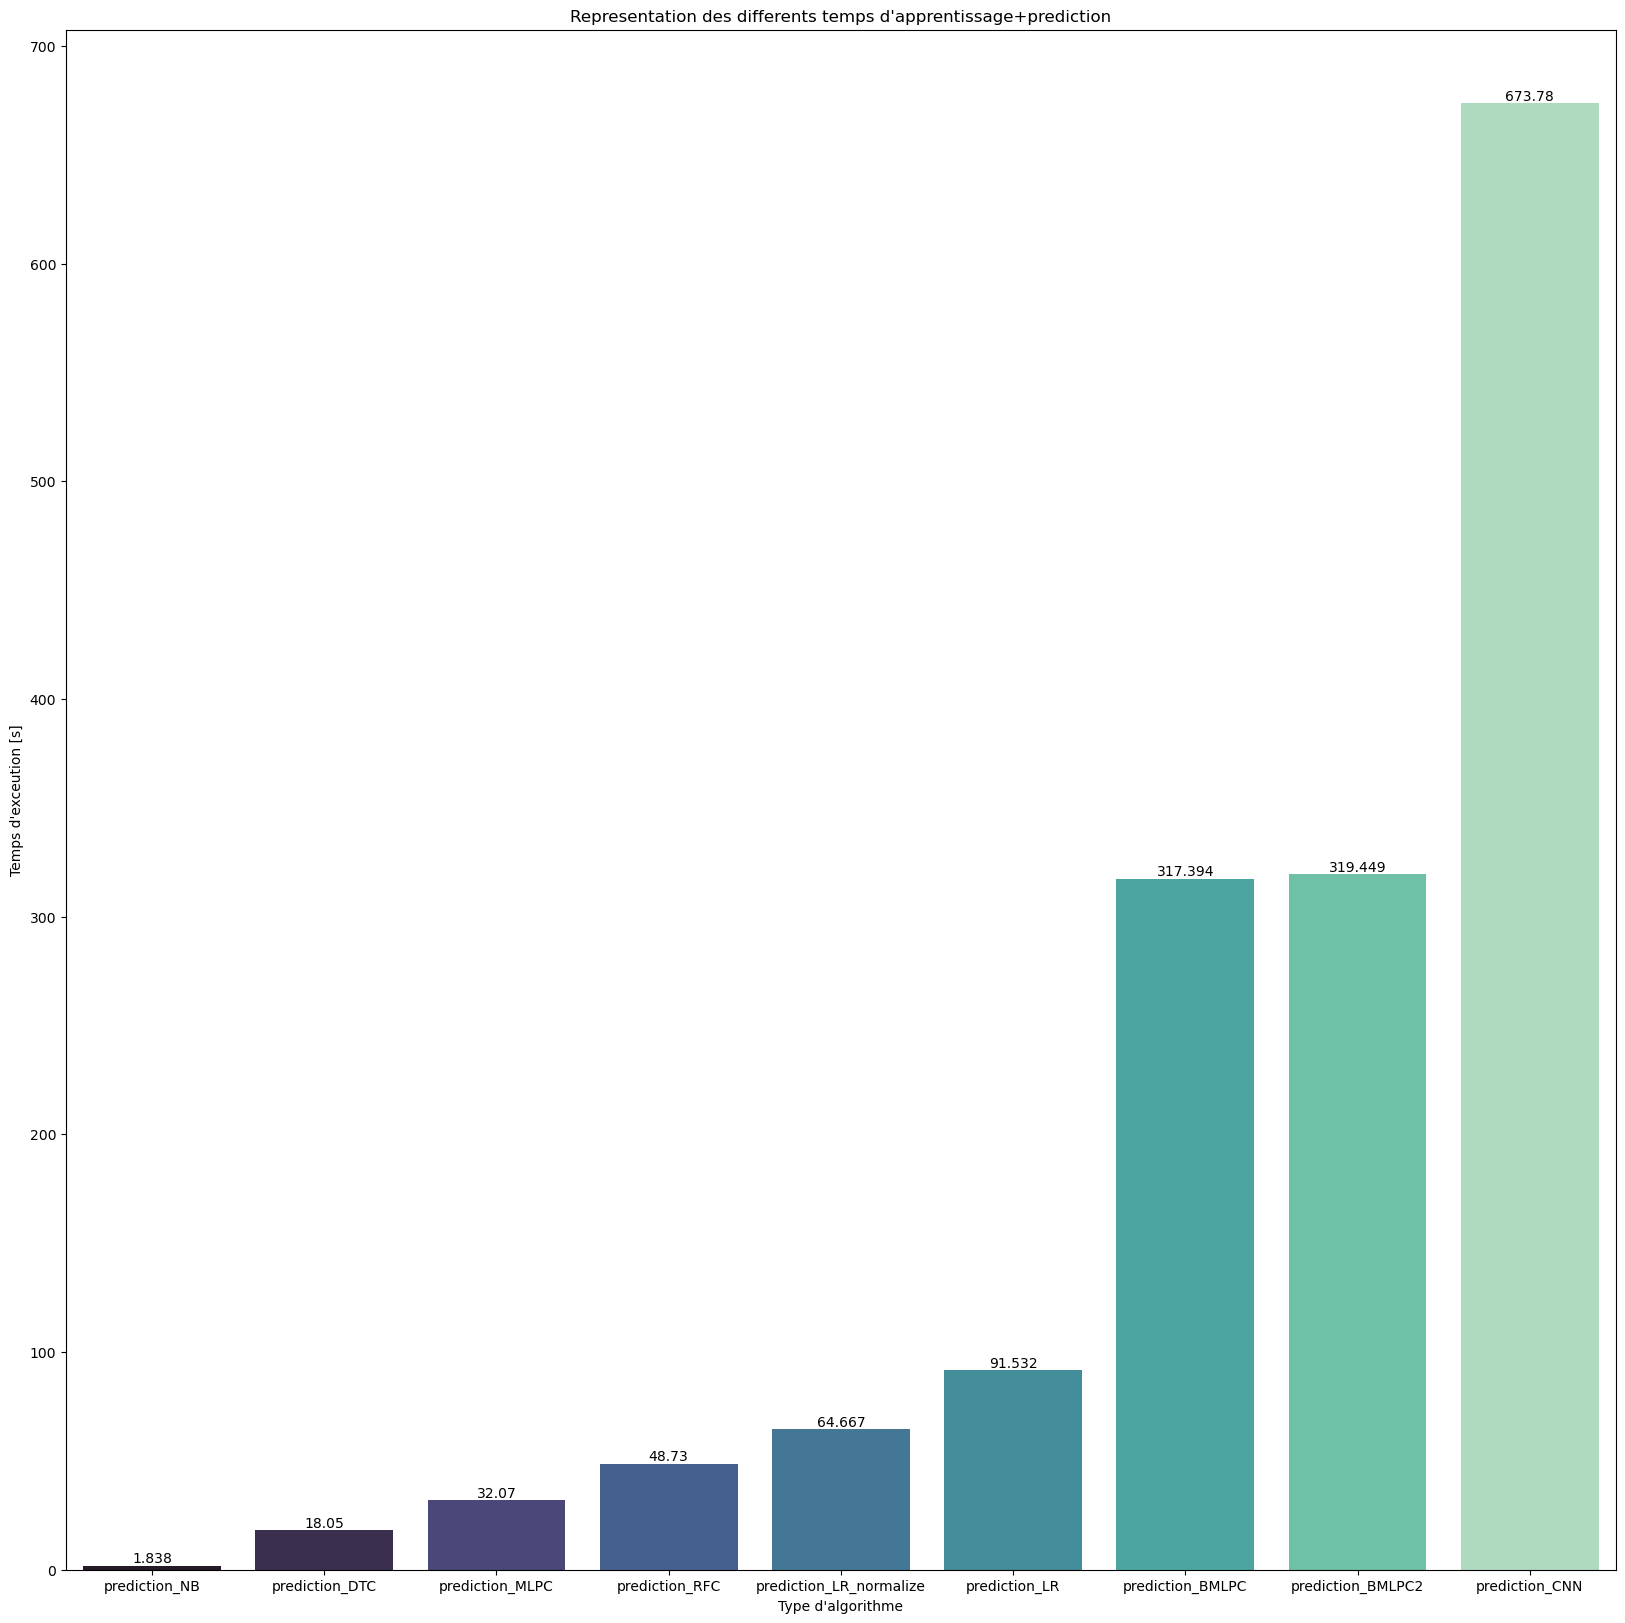

In [53]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('prediction_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

df_prediction = pd.DataFrame(data, index=['Temps_execution_s'])
df_prediction

figure,ax = plt.subplots(figsize=(20, 20))
df_prediction = pd.DataFrame(data, index=['Temps_execution_s'])
df_prediction.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_prediction,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage+prediction")
fig.bar_label(ax.containers[0])

In [139]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('prediction_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

df_prediction = pd.DataFrame(data, index=['Temps_execution_s'])
df_prediction


# Parcourt toutes les variables de l'environnement d'exécution
data2 = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('apprentissage_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data2[var] = globals()[var]

df_apprentissage = pd.DataFrame(data2, index=['Temps_execution_s'])

df3 = pd.concat([df_apprentissage.T,df_prediction.T])
display(df3)
temps_apprentisage_LR = df3.loc['prediction_LR']-df3.loc['apprentissage_LR']
temps_apprentissage_LR_normalize = df3.loc['prediction_LR_normalize']-df3.loc['apprentissage_LR_normalize']
temps_apprentissage_NB = df3.loc['prediction_LR_normalize']-df3.loc['apprentissage_LR_normalize'] 
temps_apprentissage_DTC = df3.loc['prediction_LR_normalize']-df3.loc['apprentissage_LR_normalize']
temps_apprentissage_RFC = df3.loc['prediction_LR_normalize']-df3.loc['apprentissage_LR_normalize']
temps_apprentissage_MLPC = df3.loc['prediction_LR_normalize']-df3.loc['apprentissage_LR_normalize']

,Temps_execution_s
apprentissage_LR,91.504
apprentissage_LR_normalize,64.649
apprentissage_NB,0.601
apprentissage_DTC,18.031
apprentissage_RFC,48.339
apprentissage_MLPC,32.027
apprentissage_BMLPC,28.220
apprentissage_BMLPC2,27.846
apprentissage_CNN,671.930
prediction_LR,91.532


ValueError: x must have 2 or fewer dimensions

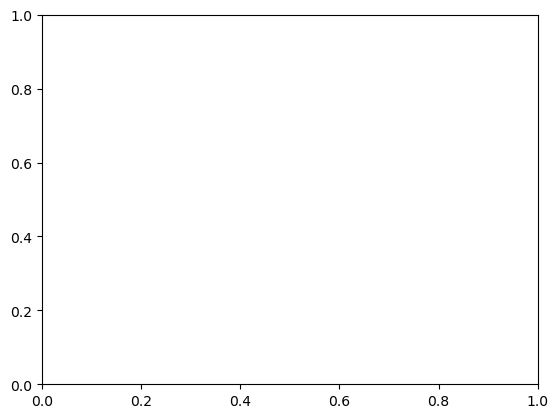

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframes
df1 = df_apprentissage
df2 = df_prediction

# Create the histogram
plt.hist([df1, df2], stacked=True)

# Show the plot
plt.show()

In [148]:
df1 = df_apprentissage.to_numpy()
df2 = df_prediction.to_numpy()
df3 = df2-df1

df3

array([[2.80000e-02, 1.80000e-02, 1.23700e+00, 1.90000e-02, 3.91000e-01,
        4.30000e-02, 2.89174e+02, 2.91603e+02, 1.85000e+00]])

In [190]:
df_score_f1score.T.reset_index()
df5=df_score_f1score.T.reset_index()
df6=df_prediction.T.reset_index()
df_graph=pd.concat([df5,df6],axis=1,ignore_index=True)
df_graph

,0,1,2,3
0,score_classification_report_NB,0.369259,prediction_LR,91.532
1,score_classification_report_DTC,0.422232,prediction_LR_normalize,64.667
2,score_classification_report_raw_LR,0.671070,prediction_NB,1.838
3,score_classification_report_normalize_LR,0.675321,prediction_DTC,18.050
4,score_classification_report_MLPC,0.774610,prediction_RFC,48.730
5,score_classification_report_BMLPC,0.789486,prediction_MLPC,32.070
6,score_classification_report_BMLPC2,0.793798,prediction_BMLPC,317.394
7,score_classification_report_RFC,0.796999,prediction_BMLPC2,319.449
8,score_classification_report_CNN,0.980636,prediction_CNN,673.780


In [227]:
df_graph[1]
df_graph.columns=['Type_score','Score','Type_prediction','Temps']


KeyError: 1

In [228]:
df_graph

,Type_score,Score,Type_prediction,Temps
0,score_classification_report_NB,0.369259,prediction_LR,91.532
1,score_classification_report_DTC,0.422232,prediction_LR_normalize,64.667
2,score_classification_report_raw_LR,0.671070,prediction_NB,1.838
3,score_classification_report_normalize_LR,0.675321,prediction_DTC,18.050
4,score_classification_report_MLPC,0.774610,prediction_RFC,48.730
5,score_classification_report_BMLPC,0.789486,prediction_MLPC,32.070
6,score_classification_report_BMLPC2,0.793798,prediction_BMLPC,317.394
7,score_classification_report_RFC,0.796999,prediction_BMLPC2,319.449
8,score_classification_report_CNN,0.980636,prediction_CNN,673.780


<AxesSubplot:xlabel='Score', ylabel='Temps'>

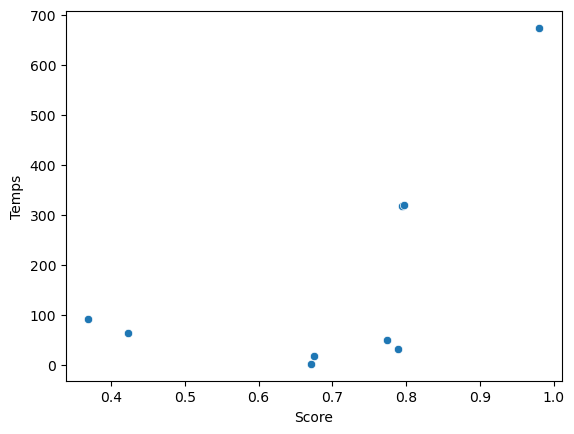

In [230]:
sns.scatterplot(data=df_graph, x="Score", y="Temps")